In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# json 파일 다루기
import json

In [4]:
# 파일 존재 여부 확인용
import os

In [5]:
# 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

# 변수 목록

## 고정 변수

In [7]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [6]:
# 한번에 읽어올 이미지 개수
img_read_size = 5000

# 크기 조정 사이즈
res_width = 200
res_height = 200

train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test/Male/Train/" # Train 데이터를 저장할 디렉토리명
test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test/Male/Test/" # Validation 데이터를 저장할 디렉토리명

In [8]:
eng_label_name = ['Gofcore', 'Golf', 'Dandy', 'Romantic', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']

## 폴더 변경 변수

In [121]:
label_num = 10
print(eng_label_name[label_num])

Casual


In [122]:
ori_img_dir_name = "./Dataset/Musinsa_Dataset/Original/Male/Image/" + eng_label_name[label_num]
ori_json_dir_name = "./Dataset/Musinsa_Dataset/Original/Male/Json/" + eng_label_name[label_num]

print(os.path.isdir(ori_img_dir_name))
print(os.path.isdir(ori_json_dir_name))

True
True


In [123]:
print(len(os.listdir(ori_img_dir_name)))
print(len(os.listdir(ori_json_dir_name)))

dir_file_size = len(os.listdir(ori_json_dir_name))

2079
2079


## 분할실행용 변수

In [124]:
# 폴더를 변경할 때마다 초기화
read_point = 1

In [125]:
print(read_point)

1


In [127]:
train_save_point = 13110
test_save_point = 3282

In [128]:
print(train_end_point)
print(test_end_point)

13110
3282


In [129]:
train_save_point = train_end_point
test_save_point = test_end_point

print(train_save_point)
print(test_save_point)

13110
3282


# 데이터 불러오기

In [130]:
dataset_list = []

while (len(dataset_list) < img_read_size):

    # 디렉토리 내 최대 파일까지 읽은 경우
    if read_point > dir_file_size:
      break

    # 원본 파일 읽어오기
    img_path = ori_img_dir_name + '/' +  str(read_point) + ".jpg"
    json_path = ori_json_dir_name + '/' + str(read_point) + ".json"

    tmp_list = []

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(read_point) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(json_path, "r") as loadfile:
      json_file = json.load(loadfile)
    if json_file is None:
        print(str(read_point) + ".json File Load Failed!!")
        break


    tmp_list.append(img_file)
    tmp_list.append(json_file)

    dataset_list.append(tmp_list)

    if ((read_point)%100) == 0: # 진행도 체크용
        print(str(read_point) + "개 파일 읽어오기 완료")

    read_point = read_point+1


print()
print("Complete")
print("다음 read point: " + str(read_point))

100개 파일 읽어오기 완료
200개 파일 읽어오기 완료
300개 파일 읽어오기 완료
400개 파일 읽어오기 완료
500개 파일 읽어오기 완료
600개 파일 읽어오기 완료
700개 파일 읽어오기 완료
800개 파일 읽어오기 완료
900개 파일 읽어오기 완료
1000개 파일 읽어오기 완료
1100개 파일 읽어오기 완료
1200개 파일 읽어오기 완료
1300개 파일 읽어오기 완료
1400개 파일 읽어오기 완료
1500개 파일 읽어오기 완료
1600개 파일 읽어오기 완료
1700개 파일 읽어오기 완료
1800개 파일 읽어오기 완료
1900개 파일 읽어오기 완료
2000개 파일 읽어오기 완료

Complete
다음 read point: 2080


In [131]:
len(dataset_list)

2079

In [132]:
len(dataset_list[0])

2

# 모델 예측을 위해 이미지 크기 조정

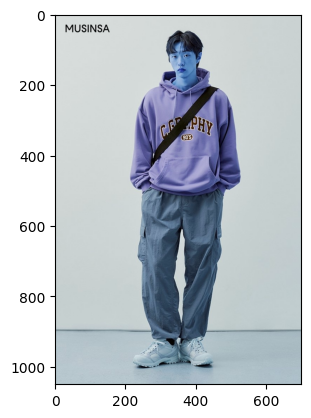

In [133]:
# 원본 이미지 크기 확인
plt.imshow(dataset_list[0][0])
plt.show()

In [134]:
for data in dataset_list:
    data[0] = cv2.resize(data[0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

print("Complete")

Complete


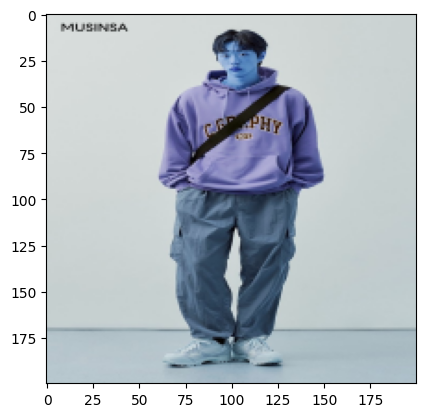

In [135]:
# 조정된 이미지 크기 확인
plt.imshow(dataset_list[0][0])
plt.show()

# 계절 정보 통계

In [136]:
season_list = []

for data in dataset_list:
    season_list.append(data[1]['Season'])

print("Complete")

Complete


In [137]:
season_count = []

season_count.append(season_list.count('Spring'))
season_count.append(season_list.count('Summer'))
season_count.append(season_list.count('Autumn'))
season_count.append(season_list.count('Winter'))
season_count.append(season_list.count('None'))

print(season_count)

[347, 515, 400, 817, 0]


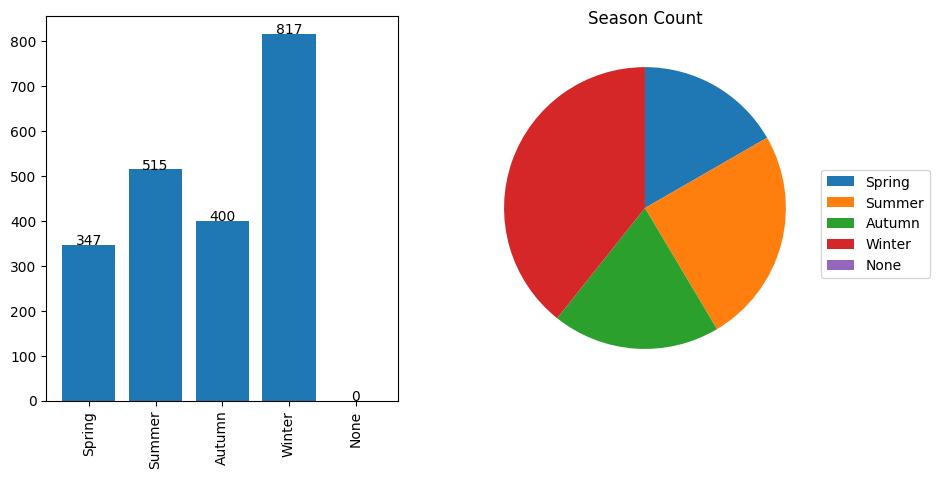

In [138]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

## 계절 정보 없는 이미지가 있다면 정보 추가

In [97]:
season_list.index("None")

1130

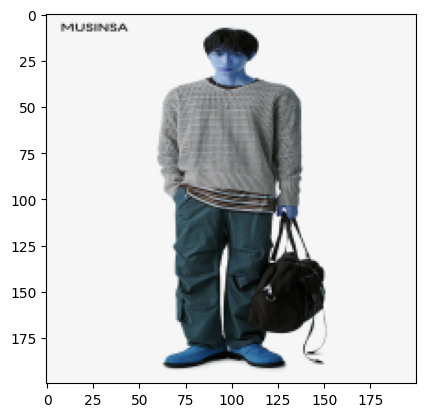

In [98]:
plt.imshow(dataset_list[1130][0])
plt.show()

In [99]:
dataset_list[1130][1]

{'Season': 'None', 'Labeling': 'Amekaji'}

In [100]:
dataset_list[1130][1]['Season'] = 'Autumn'

# Train-Test Split

In [139]:
# 8:2 비율로 train-test split
train, test = train_test_split(dataset_list, test_size=0.2, stratify=season_list) # stratify, random_state 설정 가능

In [140]:
len(train)

1663

In [141]:
len(test)

416

# Train-Test 후 계절 정보 통계

## Train 계절 정보 통계

In [142]:
season_list = []

for data in train:
    season_list.append(data[1]['Season'])

print("Complete")

Complete


In [143]:
season_count = []

season_count.append(season_list.count('Spring'))
season_count.append(season_list.count('Summer'))
season_count.append(season_list.count('Autumn'))
season_count.append(season_list.count('Winter'))
season_count.append(season_list.count('None'))

print(season_count)

[278, 412, 320, 653, 0]


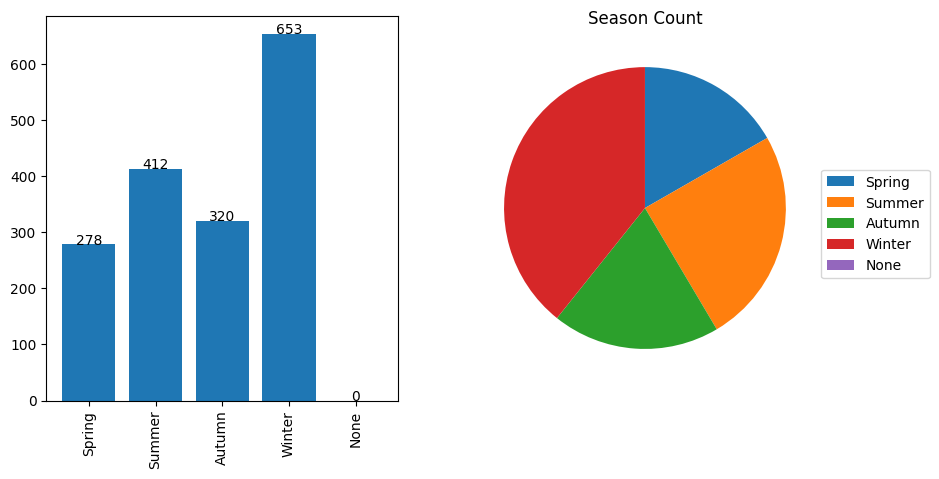

In [144]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

## Test 계절 정보 통계

In [145]:
season_list = []

for data in test:
    season_list.append(data[1]['Season'])

print("Complete")

Complete


In [146]:
season_count = []

season_count.append(season_list.count('Spring'))
season_count.append(season_list.count('Summer'))
season_count.append(season_list.count('Autumn'))
season_count.append(season_list.count('Winter'))
season_count.append(season_list.count('None'))

print(season_count)

[69, 103, 80, 164, 0]


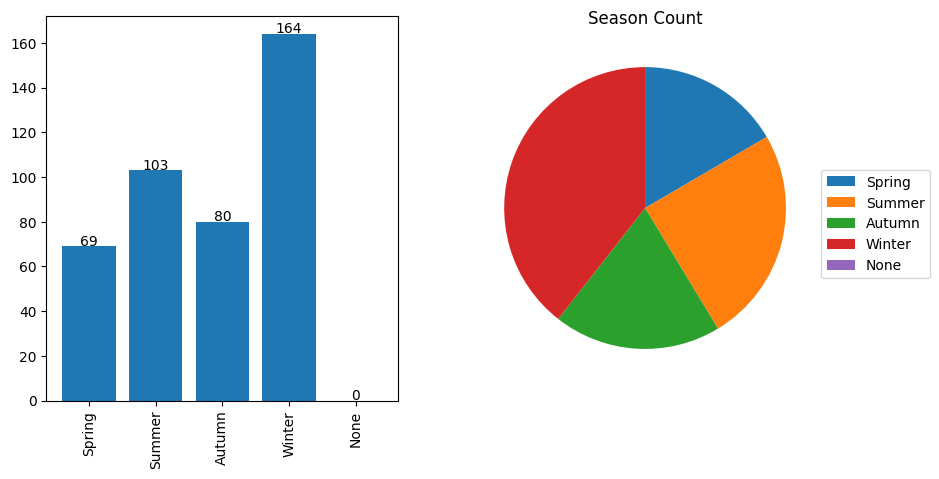

In [147]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

# 학습용 데이터를 X와 Y(Json)로 구분

In [148]:
x_train = []
y_train = []

for data in train:
    x_train.append(data[0])
    y_train.append(data[1])

print("Complete")

Complete


In [149]:
x_test = []
y_test = []

for data in test:
    x_test.append(data[0])
    y_test.append(data[1])

print("Complete")

Complete


# 학습용 데이터를 폴더에 저장

In [150]:
i = train_save_point

for img in x_train:
    success = cv2.imwrite(train_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [151]:
i = train_save_point

for json_file in y_train:
    json_path = train_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    train_end_point = i

print("Complete")

Complete


In [152]:
i = test_save_point

for img in x_test:
    success = cv2.imwrite(test_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [153]:
i = test_save_point

for json_file in y_test:
    json_path = test_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    test_end_point = i

print("Complete")

Complete


In [154]:
print(train_end_point)

14773


In [155]:
print(test_end_point)

3698


# 실제 폴더 확인